<h1>Handwritten digits classification using neural network</h1>

In [1]:
#importing libraries and setting up configs

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<h2> Loading input and output values for train and test data provided of <i>MNIST</i> in Keras library</h2>

In [3]:
(trainX, trainY) , (testX, testY) =keras.datasets.mnist.load_data()

In [4]:
# inserting np array into dataframe for analysing data and maps

In [5]:
# Flattening 28*28 pixel parameter in a single row
dfTrainX=pd.DataFrame(data=trainX.reshape(len(trainX),28*28),columns=["Pixel "+str(i+1) for i in range(28*28)])
dfTestX=pd.DataFrame(data=testX.reshape(len(testX),28*28),columns=["Pixel "+str(i+1) for i in range(28*28)])
dfTrainY=pd.DataFrame(data=trainY,columns=['digit'])
dfTestY=pd.DataFrame(data=testY,columns=['digit'])

In [6]:
dfTrainX.describe()
dfTestX.describe()

,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dfTrainY.head()
dfTestY.head()

,digit
0,5
1,0
2,4
3,1
4,9


,digit
0,7
1,2
2,1
3,0
4,4


In [8]:
dfTrainY.isna().sum()
dfTestY.isna().sum()

digit    0
dtype: int64

digit    0
dtype: int64

In [9]:
trainX.shape
testX.shape

(60000, 28, 28)

(10000, 28, 28)

<p> Train Set contains 60000 data points and Test Set contains 10000 data points. Each data point of these sets has 28*28 (2 dimension) matrix to represent a total of 784 pixels where each cell value represents intensity in grayscale value</p>

<h3>Checking the pixel parameter stored in matrix of 28 by 28</h3>

In [10]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

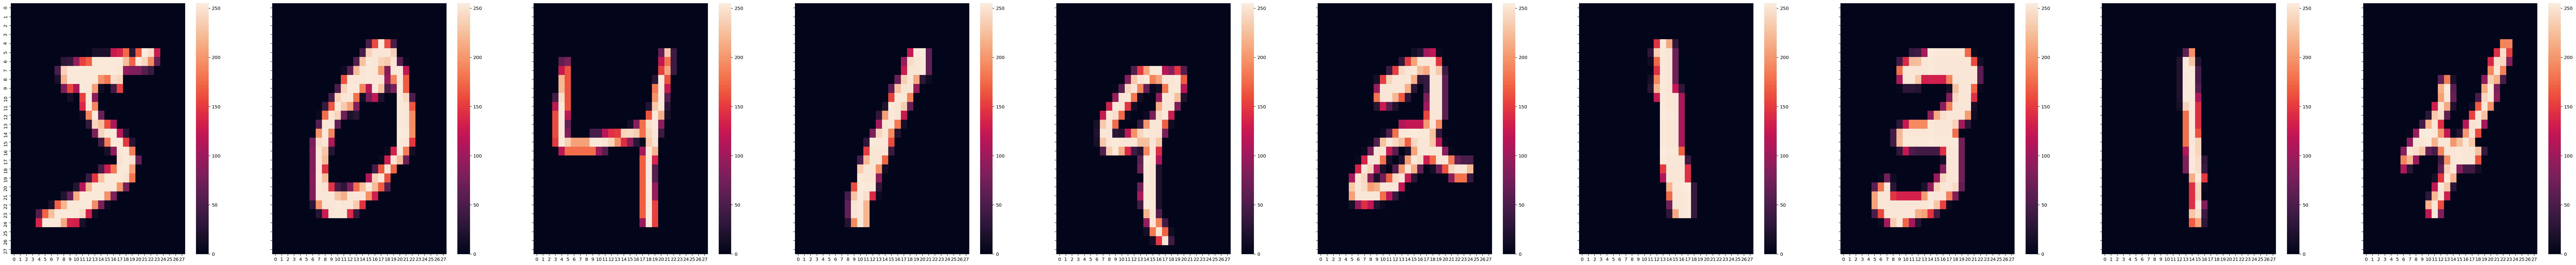

In [11]:
fig, axes = plt.subplots(1, 10,figsize=(100,10), sharey=True)
for i in range(10):
    sns.heatmap(ax=axes[i],data=trainX[i])
plt.show()

In [12]:
print(trainY[:10])

[5 0 4 1 9 2 1 3 1 4]


<AxesSubplot:xlabel='digit', ylabel='count'>

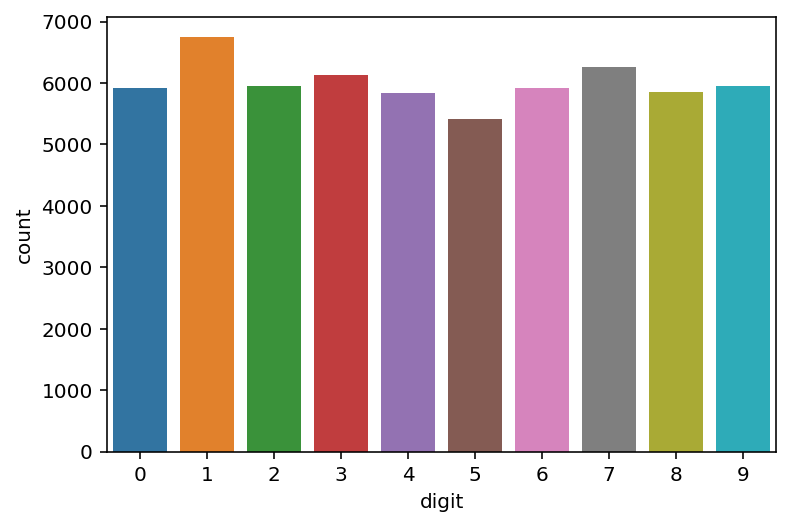

In [13]:
sns.countplot(x='digit',data=dfTrainY)

<h3>Normalizing the range of 0-255 to 0-1 based</h3>

In [14]:
dfTrainX.iloc[0].max()

255

In [15]:
dfTrainX=dfTrainX/255
dfTestX=dfTestX/255

In [16]:
dfTrainX.iloc[0].max()

1.0

<h2> Modelling using two optimizers <i>Adam</i> vs <i>SGD</i> witout using hidden layer</h2>

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [18]:
adm = keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=adm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=5)
model.evaluate(dfTestX,dfTestY)

Epoch 1/5
1875/1875 [==============================] - 1s 555us/step - loss: 0.3698 - accuracy: 0.8975
Epoch 2/5
1875/1875 [==============================] - 1s 776us/step - loss: 0.2891 - accuracy: 0.9185
Epoch 3/5
1875/1875 [==============================] - 1s 563us/step - loss: 0.2763 - accuracy: 0.9236
Epoch 4/5
1875/1875 [==============================] - 1s 541us/step - loss: 0.2693 - accuracy: 0.9258
Epoch 5/5
1875/1875 [==============================] - 1s 525us/step - loss: 0.2651 - accuracy: 0.9275


313/313 [==============================] - 0s 505us/step - loss: 0.2840 - accuracy: 0.9227


[0.2839723229408264, 0.9226999878883362]

In [19]:
adm = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=10)
model.evaluate(dfTestX,dfTestY)

Epoch 1/10
1875/1875 [==============================] - 1s 602us/step - loss: 0.2458 - accuracy: 0.9329
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2436 - accuracy: 0.9332
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2424 - accuracy: 0.9330
Epoch 4/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.2413 - accuracy: 0.9336
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2405 - accuracy: 0.9341
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2398 - accuracy: 0.9340
Epoch 7/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.2390 - accuracy: 0.9344
Epoch 8/10
1875/1875 [==============================] - 1s 527us/step - loss: 0.2378 - accuracy: 0.9348
Epoch 9/10
1875/1875 [==============================] - 1s 551us/step - loss: 0.2383 - accuracy: 0.9342
Epoch 10/10
1875/1875 [==============================] - 1s 530us/step -

313/313 [==============================] - 0s 459us/step - loss: 0.2711 - accuracy: 0.9280


[0.2711487412452698, 0.9279999732971191]

In [20]:
adm = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=10)
model.evaluate(dfTestX,dfTestY)

Epoch 1/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2289 - accuracy: 0.9380
Epoch 2/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.2281 - accuracy: 0.9379
Epoch 3/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2278 - accuracy: 0.9378
Epoch 4/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.2278 - accuracy: 0.9377
Epoch 5/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.2277 - accuracy: 0.9378
Epoch 6/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.2276 - accuracy: 0.9380
Epoch 7/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.2275 - accuracy: 0.9376
Epoch 8/10
1875/1875 [==============================] - 1s 554us/step - loss: 0.2274 - accuracy: 0.9381
Epoch 9/10
1875/1875 [==============================] - 1s 549us/step - loss: 0.2274 - accuracy: 0.9379
Epoch 10/10
1875/1875 [==============================] - 1s 547u

313/313 [==============================] - 0s 474us/step - loss: 0.2680 - accuracy: 0.9289


[0.26799947023391724, 0.9289000034332275]

In [21]:
sgd = keras.optimizers.SGD(learning_rate=0.003)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=5)
model.evaluate(dfTestX,dfTestY)

Epoch 1/5
1875/1875 [==============================] - 1s 556us/step - loss: 0.2265 - accuracy: 0.9383
Epoch 2/5
1875/1875 [==============================] - 1s 590us/step - loss: 0.2264 - accuracy: 0.9384
Epoch 3/5
1875/1875 [==============================] - 1s 528us/step - loss: 0.2264 - accuracy: 0.9384
Epoch 4/5
1875/1875 [==============================] - 1s 572us/step - loss: 0.2264 - accuracy: 0.9383
Epoch 5/5
1875/1875 [==============================] - 1s 522us/step - loss: 0.2264 - accuracy: 0.9384


313/313 [==============================] - 0s 471us/step - loss: 0.2677 - accuracy: 0.9283


[0.2676616311073303, 0.9283000230789185]

In [22]:
sgd = keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=10)
model.evaluate(dfTestX,dfTestY)

Epoch 1/10
1875/1875 [==============================] - 1s 540us/step - loss: 0.2261 - accuracy: 0.9385
Epoch 2/10
1875/1875 [==============================] - 1s 534us/step - loss: 0.2261 - accuracy: 0.9385
Epoch 3/10
1875/1875 [==============================] - 1s 555us/step - loss: 0.2261 - accuracy: 0.9385
Epoch 4/10
1875/1875 [==============================] - 1s 527us/step - loss: 0.2261 - accuracy: 0.9385
Epoch 5/10
1875/1875 [==============================] - 1s 524us/step - loss: 0.2261 - accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 1s 534us/step - loss: 0.2261 - accuracy: 0.9385
Epoch 7/10
1875/1875 [==============================] - 1s 527us/step - loss: 0.2261 - accuracy: 0.9384
Epoch 8/10
1875/1875 [==============================] - 1s 519us/step - loss: 0.2261 - accuracy: 0.9385
Epoch 9/10
1875/1875 [==============================] - 1s 586us/step - loss: 0.2261 - accuracy: 0.93850s - loss: 0.2
Epoch 10/10
1875/1875 [===========================

313/313 [==============================] - 0s 467us/step - loss: 0.2676 - accuracy: 0.9280


[0.26759251952171326, 0.9279999732971191]

In [23]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=5)
model.evaluate(dfTestX,dfTestY)

Epoch 1/5
1875/1875 [==============================] - 1s 548us/step - loss: 0.2270 - accuracy: 0.9379
Epoch 2/5
1875/1875 [==============================] - 1s 546us/step - loss: 0.2270 - accuracy: 0.9382
Epoch 3/5
1875/1875 [==============================] - 1s 550us/step - loss: 0.2269 - accuracy: 0.9381
Epoch 4/5
1875/1875 [==============================] - 1s 557us/step - loss: 0.2270 - accuracy: 0.9380
Epoch 5/5
1875/1875 [==============================] - 1s 591us/step - loss: 0.2270 - accuracy: 0.9378


313/313 [==============================] - 0s 471us/step - loss: 0.2682 - accuracy: 0.9282


[0.2682223916053772, 0.9282000064849854]

<p> Best accuracy reached is <b>0.9282</b> (with loss <b>0.2678</b>) using <b>SGD</b> optimisation with a learing rate of <b>0.01</b> and epoch of <b>5</b></p>

In [24]:
predictTrainY=model.predict(dfTrainX)
predictTestY=model.predict(dfTestX)

In [25]:
predictTrainLabel=[np.argmax(i) for i in predictTrainY]
predictTestLabel=[np.argmax(i) for i in predictTestY]

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

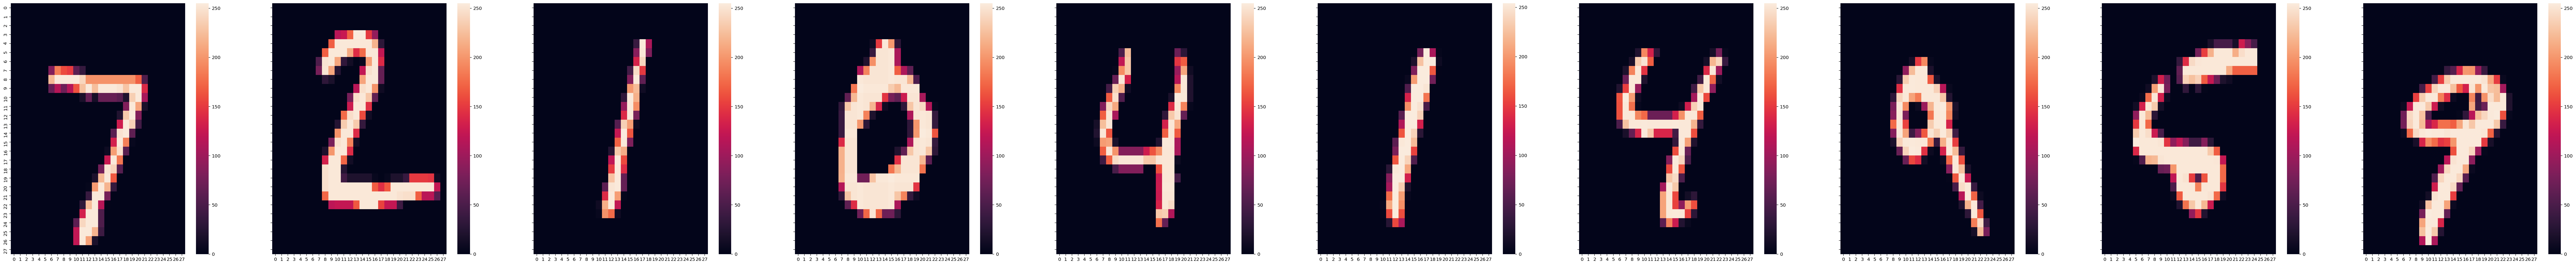

In [26]:
fig, axes = plt.subplots(1, 10,figsize=(100,10), sharey=True)
for i in range(10):
    sns.heatmap(ax=axes[i],data=testX[i])
plt.show()

In [27]:
print(predictTestLabel[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


<h3>Prining confusion matrix using tensorflow library</h3>

In [28]:
cfMatrix=tf.math.confusion_matrix(labels=dfTestY,predictions=predictTestLabel)
cfMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    1,    7,    6,    3,    1,    0],
       [   0, 1113,    4,    3,    0,    1,    3,    2,    9,    0],
       [   6,    8,  928,   17,    9,    3,   11,   10,   37,    3],
       [   3,    0,   16,  927,    0,   21,    2,   10,   24,    7],
       [   1,    1,    6,    3,  919,    0,    7,    4,    8,   33],
       [   9,    3,    2,   36,    9,  773,   14,    8,   34,    4],
       [  11,    3,    8,    1,    7,   14,  911,    1,    2,    0],
       [   1,    7,   23,    7,    5,    1,    0,  950,    2,   32],
       [   7,    8,    5,   21,    9,   24,    7,    9,  873,   11],
       [  10,    8,    1,    9,   22,    7,    0,   18,    6,  928]],
      dtype=int32)>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 42.0, 'Predicted')

Text(69.0, 0.5, 'Truth')

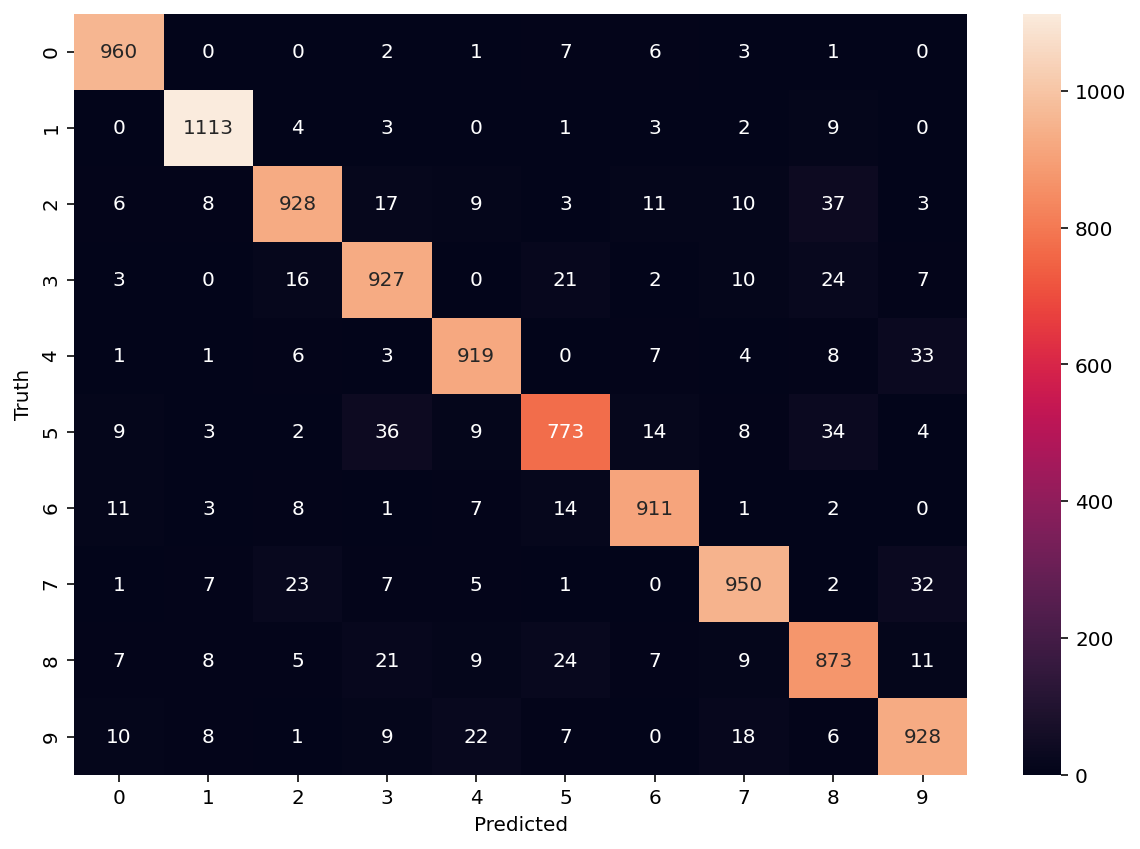

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cfMatrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2> Modelling using two optimizers <i>Adam</i> vs <i>SGD</i> using one hidden layer</h2>

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [31]:
adm = keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=adm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=5)
model.evaluate(dfTestX,dfTestY)

Epoch 1/5
1875/1875 [==============================] - 2s 745us/step - loss: 0.2144 - accuracy: 0.9360
Epoch 2/5
1875/1875 [==============================] - 1s 767us/step - loss: 0.1006 - accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.0758 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 1s 749us/step - loss: 0.0627 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.0512 - accuracy: 0.9833


313/313 [==============================] - 0s 595us/step - loss: 0.0963 - accuracy: 0.9744


[0.09631996601819992, 0.974399983882904]

In [32]:
adm = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=10)
model.evaluate(dfTestX,dfTestY)

Epoch 1/10
1875/1875 [==============================] - 2s 755us/step - loss: 0.0210 - accuracy: 0.9931
Epoch 2/10
1875/1875 [==============================] - 2s 821us/step - loss: 0.0128 - accuracy: 0.9963
Epoch 3/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.0093 - accuracy: 0.9975
Epoch 4/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.0077 - accuracy: 0.9979
Epoch 5/10
1875/1875 [==============================] - 1s 791us/step - loss: 0.0060 - accuracy: 0.9986
Epoch 6/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.0055 - accuracy: 0.9986
Epoch 7/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.0043 - accuracy: 0.9988
Epoch 8/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.0040 - accuracy: 0.9990
Epoch 9/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.0034 - accuracy: 0.9991
Epoch 10/10
1875/1875 [==============================] - 2s 815u

313/313 [==============================] - 0s 620us/step - loss: 0.1011 - accuracy: 0.9808


[0.1010894924402237, 0.9807999730110168]

In [33]:
adm = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=10)
model.evaluate(dfTestX,dfTestY)

Epoch 1/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.0011 - accuracy: 0.9998
Epoch 2/10
1875/1875 [==============================] - 1s 798us/step - loss: 5.2015e-04 - accuracy: 1.0000
Epoch 3/10
1875/1875 [==============================] - 1s 798us/step - loss: 4.0675e-04 - accuracy: 1.0000
Epoch 4/10
1875/1875 [==============================] - 2s 811us/step - loss: 3.3698e-04 - accuracy: 1.0000
Epoch 5/10
1875/1875 [==============================] - 2s 806us/step - loss: 2.9423e-04 - accuracy: 1.0000
Epoch 6/10
1875/1875 [==============================] - 2s 803us/step - loss: 2.5638e-04 - accuracy: 1.0000
Epoch 7/10
1875/1875 [==============================] - 2s 803us/step - loss: 2.2399e-04 - accuracy: 1.0000
Epoch 8/10
1875/1875 [==============================] - 2s 804us/step - loss: 1.9761e-04 - accuracy: 1.0000
Epoch 9/10
1875/1875 [==============================] - 2s 811us/step - loss: 1.7532e-04 - accuracy: 1.0000
Epoch 10/10
1875/1875 [=========

313/313 [==============================] - 0s 579us/step - loss: 0.0983 - accuracy: 0.9826


[0.09832578152418137, 0.9825999736785889]

In [34]:
sgd = keras.optimizers.SGD(learning_rate=0.003)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=5)
model.evaluate(dfTestX,dfTestY)

Epoch 1/5
1875/1875 [==============================] - 2s 740us/step - loss: 1.2793e-04 - accuracy: 1.0000
Epoch 2/5
1875/1875 [==============================] - 1s 744us/step - loss: 1.2770e-04 - accuracy: 1.0000
Epoch 3/5
1875/1875 [==============================] - 1s 721us/step - loss: 1.2748e-04 - accuracy: 1.0000
Epoch 4/5
1875/1875 [==============================] - 1s 703us/step - loss: 1.2728e-04 - accuracy: 1.0000
Epoch 5/5
1875/1875 [==============================] - 1s 709us/step - loss: 1.2709e-04 - accuracy: 1.0000


313/313 [==============================] - 0s 587us/step - loss: 0.0983 - accuracy: 0.9826


[0.09832585602998734, 0.9825999736785889]

In [35]:
sgd = keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=10)
model.evaluate(dfTestX,dfTestY)

Epoch 1/10
1875/1875 [==============================] - 1s 727us/step - loss: 1.2695e-04 - accuracy: 1.0000
Epoch 2/10
1875/1875 [==============================] - 1s 726us/step - loss: 1.2694e-04 - accuracy: 1.0000
Epoch 3/10
1875/1875 [==============================] - 1s 755us/step - loss: 1.2694e-04 - accuracy: 1.0000
Epoch 4/10
1875/1875 [==============================] - 1s 761us/step - loss: 1.2693e-04 - accuracy: 1.0000
Epoch 5/10
1875/1875 [==============================] - 1s 747us/step - loss: 1.2693e-04 - accuracy: 1.0000
Epoch 6/10
1875/1875 [==============================] - 1s 735us/step - loss: 1.2692e-04 - accuracy: 1.0000
Epoch 7/10
1875/1875 [==============================] - 1s 730us/step - loss: 1.2692e-04 - accuracy: 1.0000
Epoch 8/10
1875/1875 [==============================] - 2s 903us/step - loss: 1.2691e-04 - accuracy: 1.0000
Epoch 9/10
1875/1875 [==============================] - 2s 873us/step - loss: 1.2691e-04 - accuracy: 1.0000
Epoch 10/10
1875/1875 [=====

313/313 [==============================] - 0s 602us/step - loss: 0.0983 - accuracy: 0.9826


[0.09832582622766495, 0.9825999736785889]

In [36]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(dfTrainX, dfTrainY, epochs=5)
model.evaluate(dfTestX,dfTestY)

Epoch 1/5
1875/1875 [==============================] - 2s 731us/step - loss: 1.2678e-04 - accuracy: 1.0000
Epoch 2/5
1875/1875 [==============================] - 1s 745us/step - loss: 1.2628e-04 - accuracy: 1.0000
Epoch 3/5
1875/1875 [==============================] - 1s 797us/step - loss: 1.2584e-04 - accuracy: 1.0000
Epoch 4/5
1875/1875 [==============================] - 1s 745us/step - loss: 1.2546e-04 - accuracy: 1.0000
Epoch 5/5
1875/1875 [==============================] - 1s 762us/step - loss: 1.2512e-04 - accuracy: 1.0000


313/313 [==============================] - 0s 620us/step - loss: 0.0983 - accuracy: 0.9824


[0.09834223985671997, 0.9824000000953674]

<p> Best accuracy reached is <b>0.9818</b> (with loss <b>0.1081</b>) using <b>SGD</b> optimisation with a learing rate of <b>0.01</b> and epoch of <b>5</b></p>

In [37]:
predictTrainY=model.predict(dfTrainX)
predictTestY=model.predict(dfTestX)

In [38]:
predictTrainLabel=[np.argmax(i) for i in predictTrainY]
predictTestLabel=[np.argmax(i) for i in predictTestY]

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

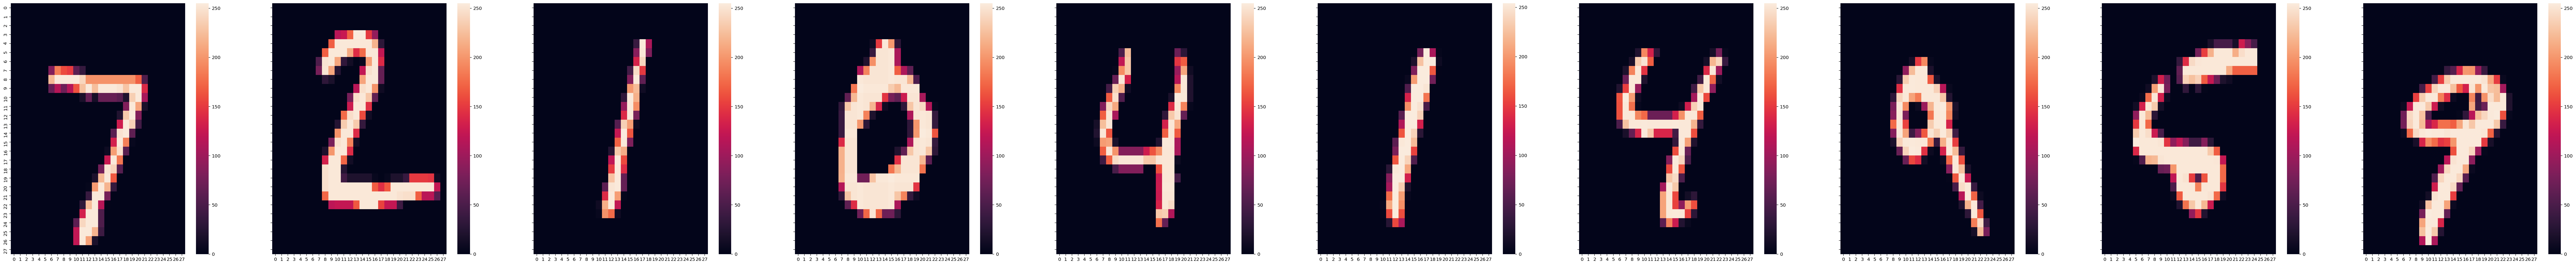

In [39]:
fig, axes = plt.subplots(1, 10,figsize=(100,10), sharey=True)
for i in range(10):
    sns.heatmap(ax=axes[i],data=testX[i])
plt.show()

In [40]:
print(predictTestLabel[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


<h3>Prining confusion matrix using tensorflow library</h3>

In [41]:
cfMatrix=tf.math.confusion_matrix(labels=dfTestY,predictions=predictTestLabel)
cfMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    1,    0,    2,    0,    1,    1],
       [   0, 1124,    3,    1,    0,    1,    2,    1,    3,    0],
       [   3,    3, 1011,    1,    2,    0,    0,    7,    4,    1],
       [   2,    0,    2,  991,    0,    3,    0,    3,    3,    6],
       [   1,    1,    4,    1,  966,    1,    1,    0,    0,    7],
       [   1,    0,    0,   16,    1,  861,    6,    1,    3,    3],
       [   2,    2,    1,    2,    6,    4,  940,    0,    1,    0],
       [   1,    4,    7,    4,    1,    0,    0, 1005,    1,    5],
       [   4,    0,    3,    2,    2,    2,    1,    2,  955,    3],
       [   1,    2,    1,    2,    7,    4,    1,    1,    4,  986]],
      dtype=int32)>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 42.0, 'Predicted')

Text(69.0, 0.5, 'Truth')

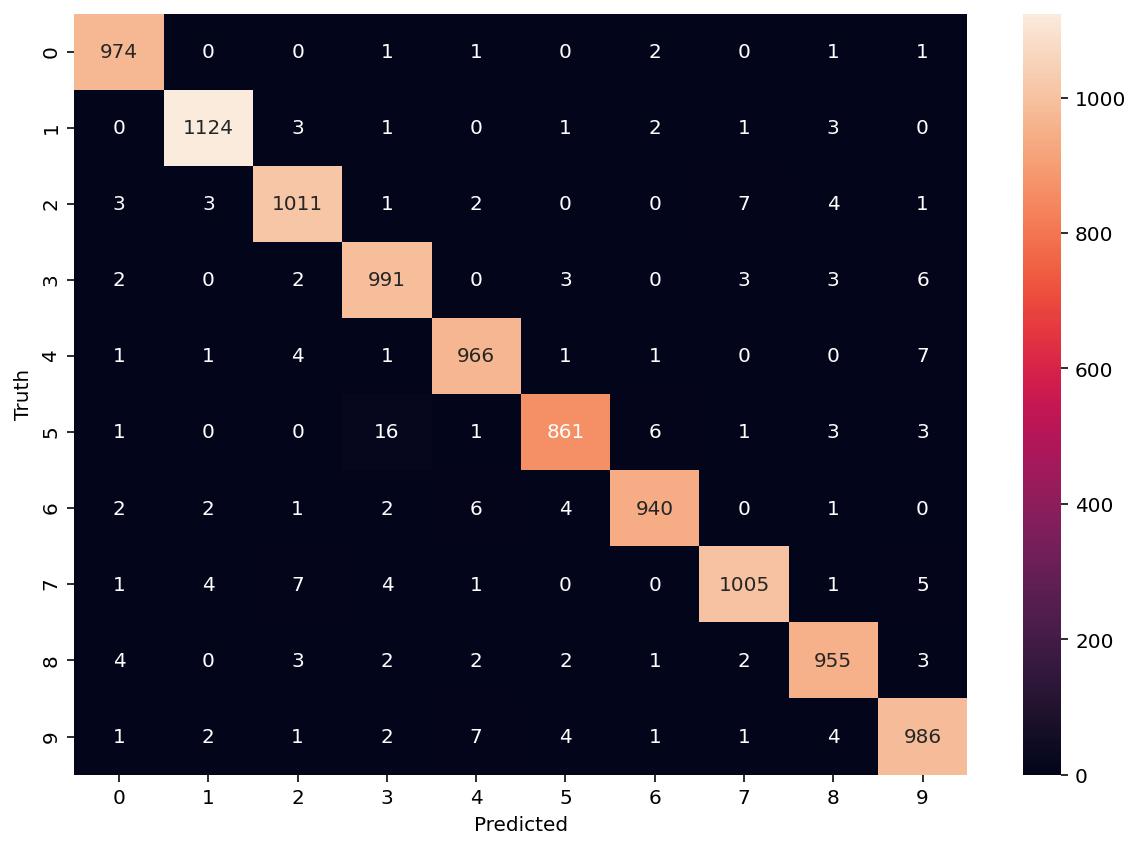

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(cfMatrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<p>Using one hidden layer improved the accuracy of the model drastically</p>
<p>SGD seemed a better choice than Adam optimization technique giving higher accuracy</p>

<h3>References used</h3>
<ol>
    <li>Followed <b><a href="http://neuralnetworksanddeeplearning.com/chap1.html">site</a></b> to understand theory related deep learning</li>
  <li>Read <b><a href="https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e">toward data science </a></b>article to study briefly about various optimization technique</li>
    <li>Used <b>Coursera</b> Machine learning course by Andrew Ng to understand algorithms on deep learning</li>
    <li>Used <b>documentations</b> of Keras and seaborn and matplot libraries</li>
</ol>